In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../../Datasets/class_exercise/snsdata1.csv")
df.head()

,grad year,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2022,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2022,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2022,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
df.shape

(4566, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   grad year     4566 non-null   int64  
 1   gender        4131 non-null   object 
 2   age           3840 non-null   float64
 3   friends       4566 non-null   int64  
 4   basketball    4566 non-null   int64  
 5   football      4566 non-null   int64  
 6   soccer        4566 non-null   int64  
 7   softball      4566 non-null   int64  
 8   volleyball    4566 non-null   int64  
 9   swimming      4566 non-null   int64  
 10  cheerleading  4566 non-null   int64  
 11  baseball      4566 non-null   int64  
 12  tennis        4566 non-null   int64  
 13  sports        4566 non-null   int64  
 14  cute          4566 non-null   int64  
 15  sex           4566 non-null   int64  
 16  sexy          4566 non-null   int64  
 17  hot           4566 non-null   int64  
 18  kissed        4566 non-null 

age, gender has missing values

In [4]:
df_cat = df.select_dtypes(include='object')

In [9]:
df.isna().sum()

grad year         0
gender          435
age             726
friends           0
basketball        0
football          0
soccer            0
softball          0
volleyball        0
swimming          0
cheerleading      0
baseball          0
tennis            0
sports            0
cute              0
sex               0
sexy              0
hot               0
kissed            0
dance             0
band              0
marching          0
music             0
rock              0
god               0
church            0
jesus             0
bible             0
hair              0
dress             0
blonde            0
mall              0
shopping          0
clothes           0
hollister         0
abercrombie       0
die               0
death             0
drunk             0
drugs             0
dtype: int64

In [5]:
df_cat.value_counts()

gender
F         3171
M          960
Name: count, dtype: int64

In [6]:
mode_gender = df_cat['gender'].mode()[0]  # Get the mode
df_cat['gender'].fillna(mode_gender, inplace=True)

In [7]:
df_cat

,gender
0,M
1,F
2,M
3,F
4,F
...,...
4561,F
4562,F
4563,F
4564,F


In [12]:
df_num = df.select_dtypes(exclude='object')
df_num

,grad year,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2022,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,18.801,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2022,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2022,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,18.995,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2022,18.240,28,0,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4562,2022,18.628,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4563,2022,18.987,35,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4564,2022,18.861,46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

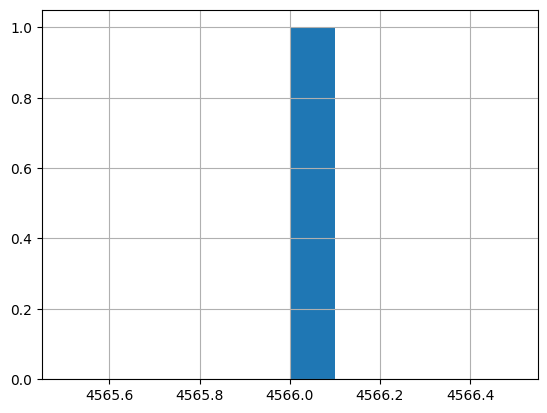

In [17]:
df_num['grad year'].value_counts().hist()

All entries are 2022. So drop the column

In [10]:
df_num.drop(columns=['grad year'], inplace=True)

Age column is float type

In [11]:
df_num['age'] = np.floor(df_num['age']).astype(pd.Int64Dtype())
df_num.head()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,18,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,18,69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [23]:
df_num['age'].value_counts()

age
18.289    20
18.346    17
18.533    16
18.335    16
18.316    16
          ..
17.985     1
19.830     1
21.462     1
19.680     1
14.962     1
Name: count, Length: 773, dtype: int64

In [24]:
df_num['age'].describe()

count    3840.000000
mean       19.149429
std         6.388005
min         5.194000
25%        18.379000
50%        18.678000
75%        18.987750
max       106.927000
Name: age, dtype: float64

In [14]:
df_num['age'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

0.10    18
0.20    18
0.30    18
0.40    18
0.50    18
0.60    18
0.70    18
0.80    19
0.90    19
0.95    19
Name: age, dtype: Int64

Most ages are clustered closely around 18–19 years.

In [25]:
age_mode = df_num['age'].mode()[0]
df_num.fillna(age_mode, inplace=True)

In [26]:
df_num.head(10)

,grad year,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2022,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,18.801,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2022,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2022,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,18.995,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,2022,18.289,142,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2022,18.930,72,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,2022,18.322,17,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2022,19.055,52,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2022,18.708,39,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Friends

In [17]:
df_num['friends'].describe()

count    4566.000000
mean       26.120456
std        32.065369
min         0.000000
25%         2.000000
50%        16.000000
75%        38.000000
max       373.000000
Name: friends, dtype: float64

In [18]:
df_num['friends'].value_counts()

friends
0      990
1      137
2      103
3       86
5       79
      ... 
139      1
115      1
234      1
128      1
151      1
Name: count, Length: 170, dtype: int64

<Axes: >

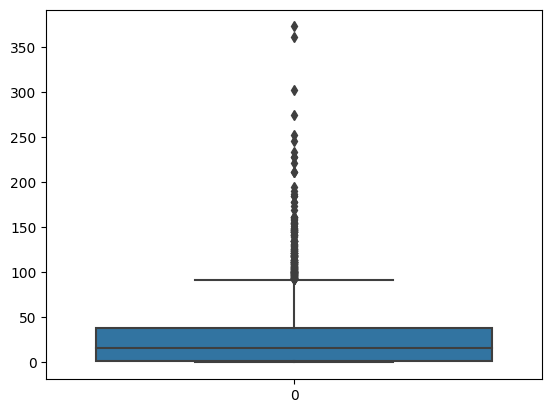

In [19]:
sns.boxplot(df_num['friends'])

In [20]:
def outlierTreat(df):
    upper_bound = df.quantile(.9)
    lower_bound = df.quantile(.1)
    return df.clip(lower=lower_bound, upper=upper_bound)

<Axes: >

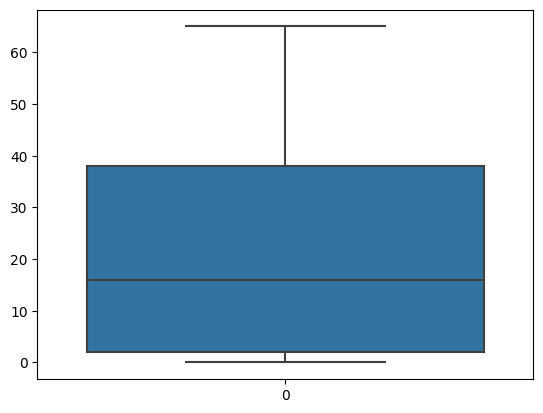

In [21]:
df_num['friends'] = outlierTreat(df['friends'])
sns.boxplot(outlierTreat(df['friends']))

In [22]:
df_num['friends']

0        7
1        0
2       65
3        0
4       10
        ..
4561    28
4562     1
4563    35
4564    46
4565     0
Name: friends, Length: 4566, dtype: int64

In [23]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4566.0,18.559133,5.869884,5.0,18.0,18.0,18.0,106.0
friends,4566.0,22.726237,22.100268,0.0,2.0,16.0,38.0,65.0
basketball,4566.0,0.211345,0.759756,0.0,0.0,0.0,0.0,22.0
football,4566.0,0.228866,0.68625,0.0,0.0,0.0,0.0,10.0
soccer,4566.0,0.150898,0.699715,0.0,0.0,0.0,0.0,14.0
softball,4566.0,0.105125,0.596364,0.0,0.0,0.0,0.0,12.0
volleyball,4566.0,0.091108,0.493573,0.0,0.0,0.0,0.0,11.0
swimming,4566.0,0.101183,0.399686,0.0,0.0,0.0,0.0,7.0
cheerleading,4566.0,0.073587,0.440371,0.0,0.0,0.0,0.0,9.0
baseball,4566.0,0.098774,0.583162,0.0,0.0,0.0,0.0,16.0


In [24]:
df_num.columns

Index(['age', 'friends', 'basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

<Axes: >

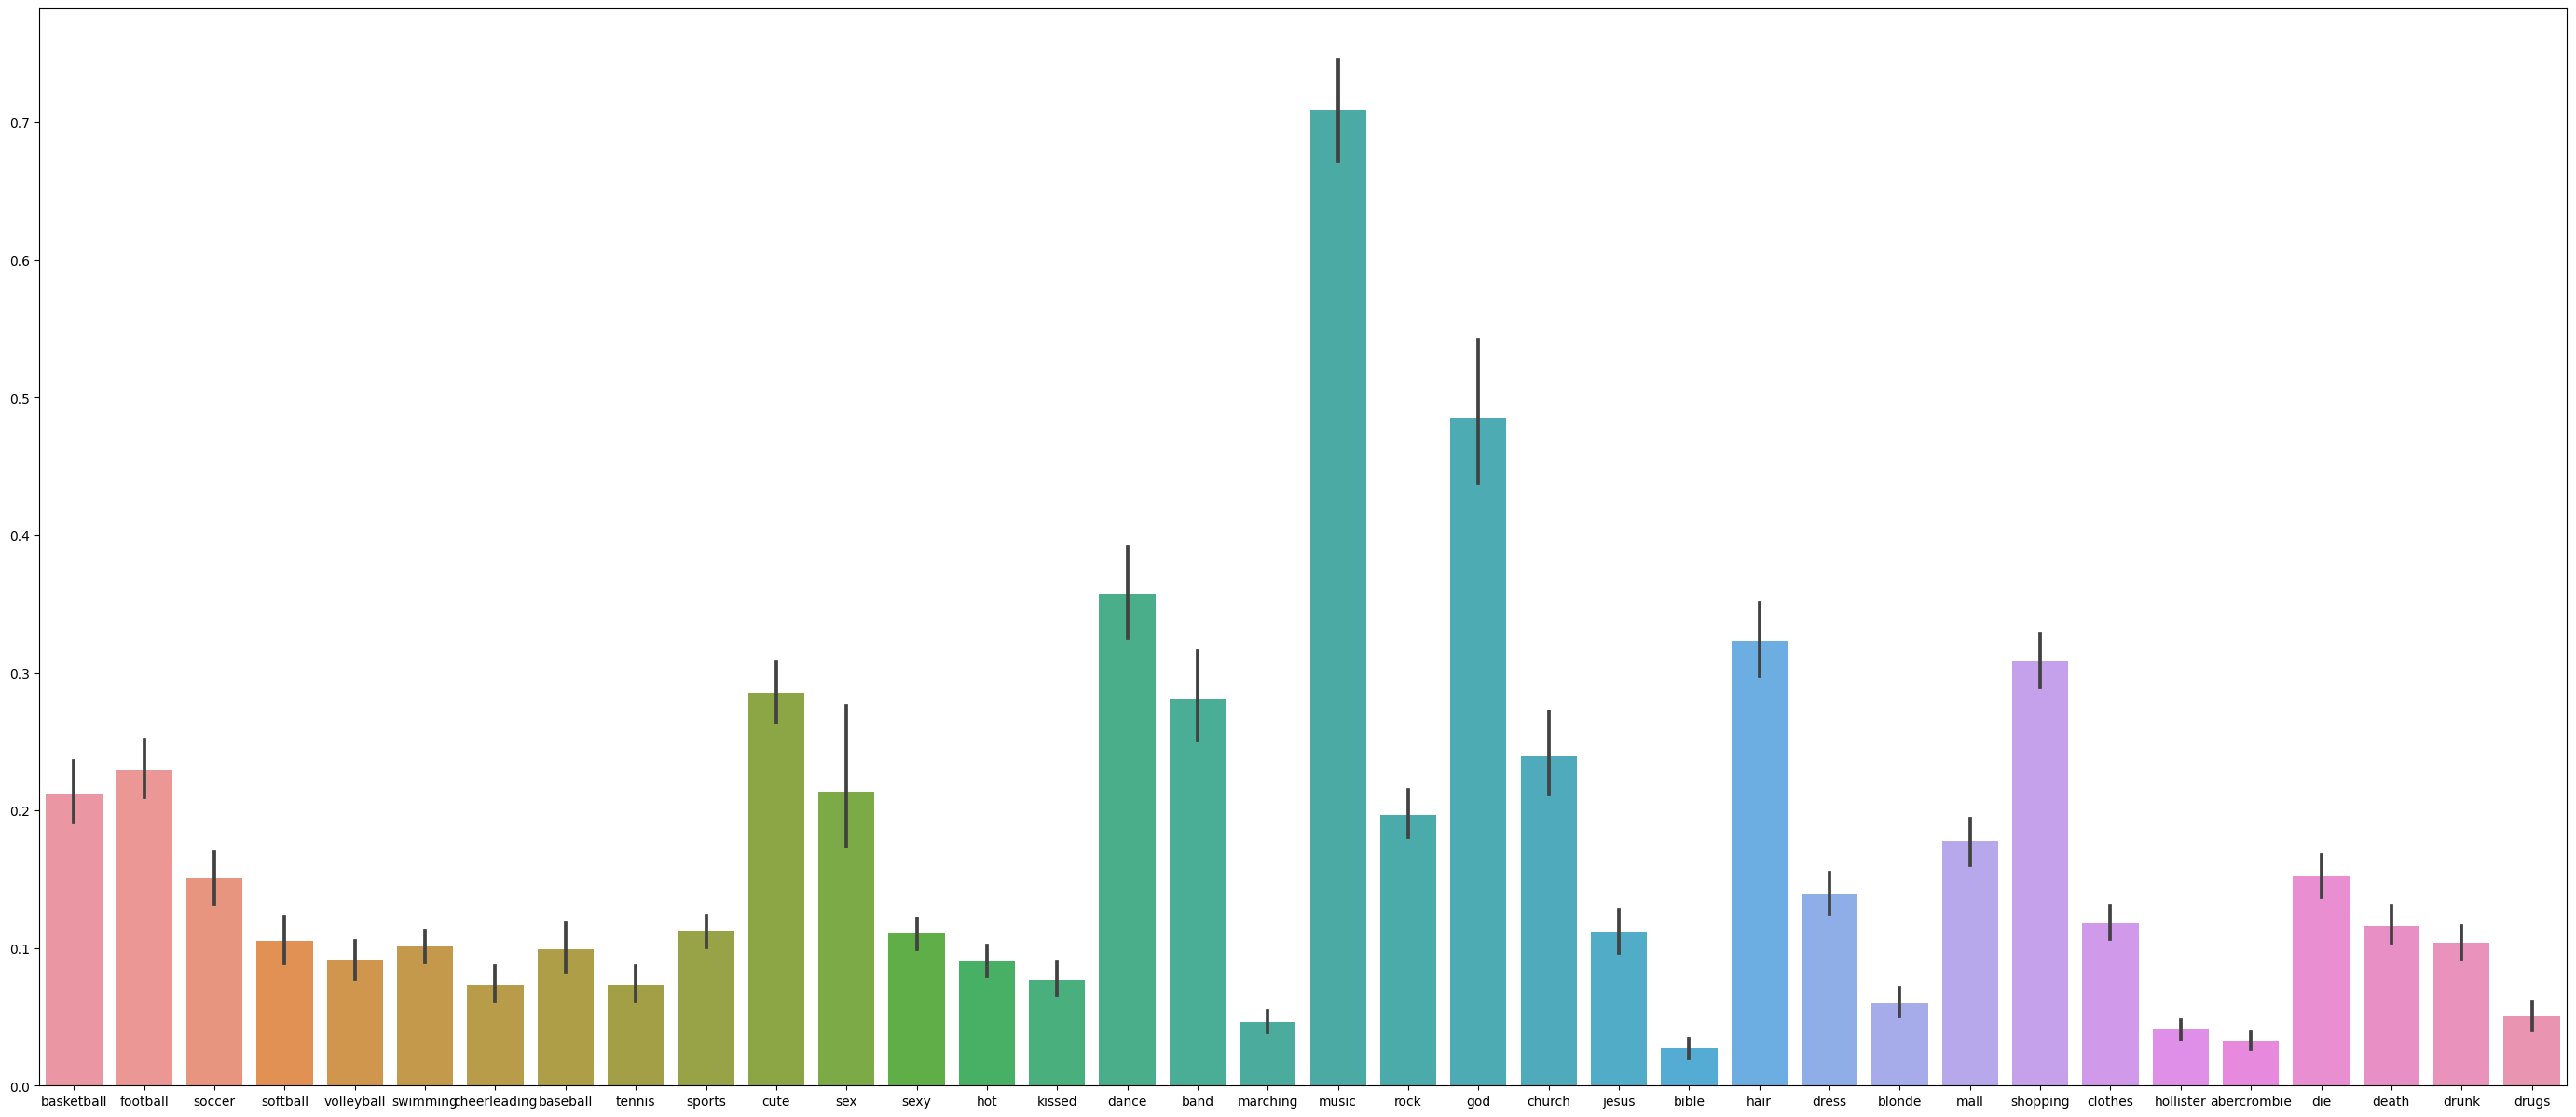

In [25]:
plt.figure(figsize=(35,15))
sns.barplot(df_num[['basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs']])

<Axes: >

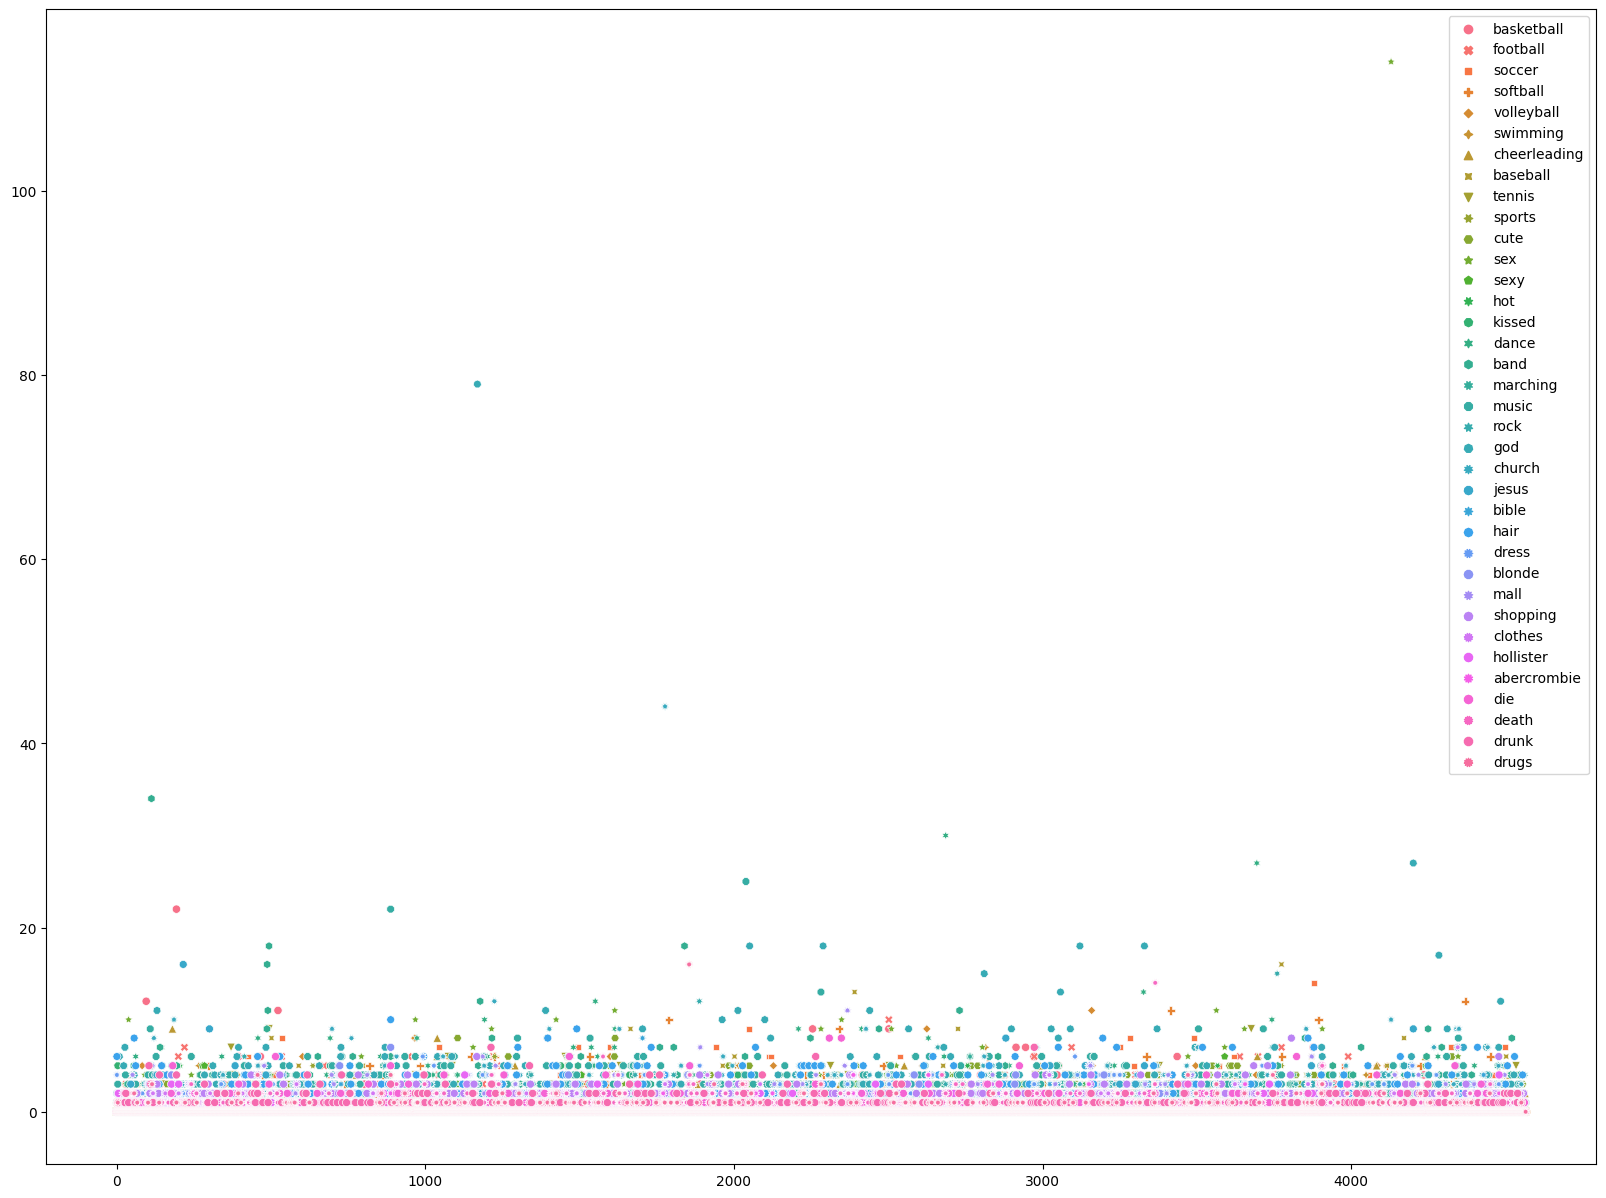

In [26]:
plt.figure(figsize=(20, 15))
sns.scatterplot(df_num[['basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair',
       'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs']])

<Axes: >

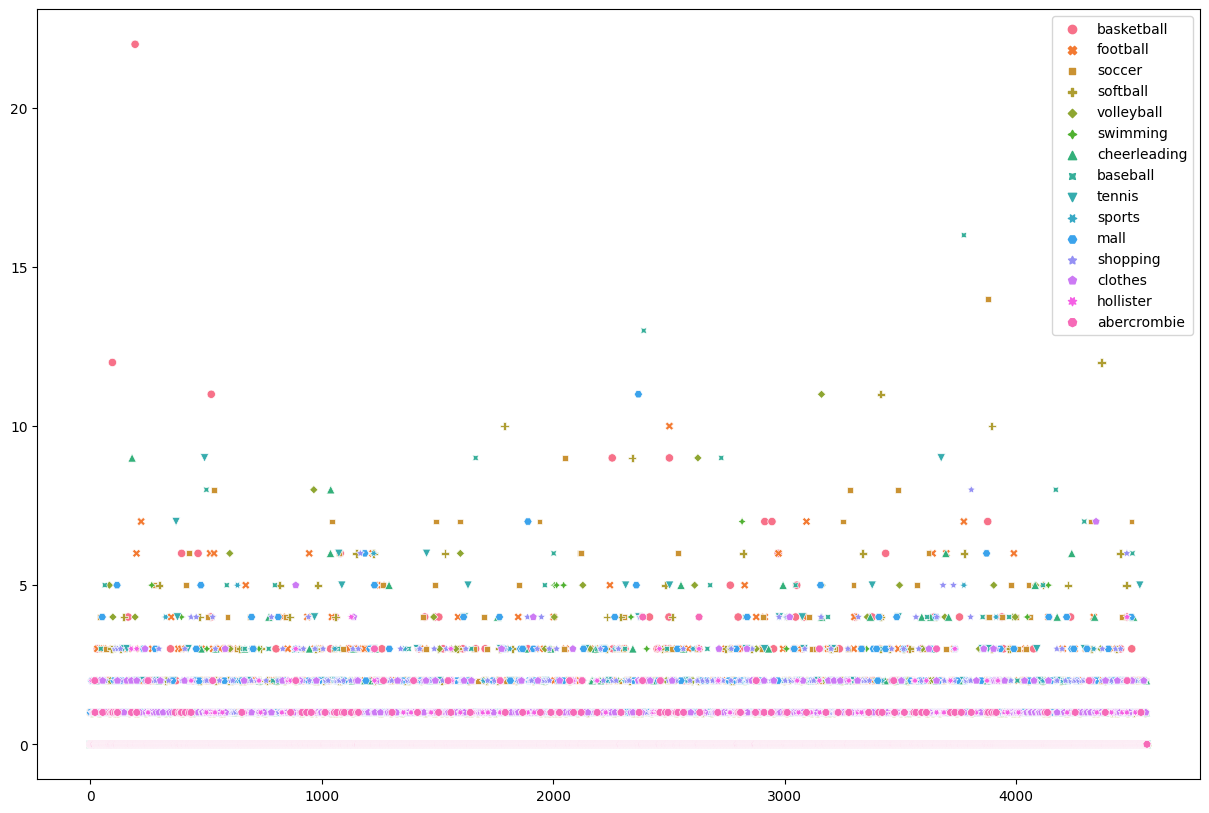

In [27]:
plt.figure(figsize=(15, 10))
sns.scatterplot(df_num[['basketball', 'football', 'soccer', 'softball',
       'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis',
       'sports', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie']])

In [33]:
df_comb= pd.concat([df_cat, df_num], axis=1)

In [34]:
df_comb

,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,M,18,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F,18,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M,18,65,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,F,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F,18,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,F,18,28,0,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4562,F,18,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4563,F,18,35,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4564,F,18,46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_dummy = pd.get_dummies(
    data=df_comb,
    columns=['gender'],
    drop_first=True,
    dtype='int'
)
df_dummy

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_M
0,18,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,18,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,18,65,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,18,28,0,0,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4562,18,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4563,18,35,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4564,18,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_dummy.describe()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_M
count,4566.0,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,...,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000
mean,18.559133,22.726237,0.211345,0.228866,0.150898,0.105125,0.091108,0.101183,0.073587,0.098774,...,0.177617,0.308585,0.118046,0.040517,0.031975,0.151993,0.116294,0.103811,0.050153,0.210250
std,5.869884,22.100268,0.759756,0.686250,0.699715,0.596364,0.493573,0.399686,0.440371,0.583162,...,0.579865,0.657621,0.408393,0.252698,0.218193,0.521292,0.461259,0.437756,0.358748,0.407531
min,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.0,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.0,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,106.0,65.000000,22.000000,10.000000,14.000000,12.000000,11.000000,7.000000,9.000000,16.000000,...,11.000000,8.000000,7.000000,4.000000,4.000000,8.000000,14.000000,7.000000,16.000000,1.000000
